<a href="https://colab.research.google.com/github/kladrillono/MLA_KEL/blob/main/FinalProject_Regression_KEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Final Project - Regression**

Kendall Ladrillono

# Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Imports for Specific Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.model_selection import GridSearchCV

Imports for Splitting Data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn import set_config
set_config(display='diagram')

Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

Confusion Matrix Function

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

Reading the Data Set

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/CS430/Concrete_Data.xls')

In [ ]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [ ]:
df.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [ ]:
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement(kg/m^3)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag(kg/m^3)', 'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash(kg/m^3)', 'Water  (component 4)(kg in a m^3 mixture)':'water(kg/m^3)', 'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer(kg/m^3)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate(kg/m^3)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate(kg/m^3)', 'Age (day)':'age_day', 'Concrete compressive strength(MPa, megapascals)':'concrete_strength(MPa)'}, inplace=True)

In [ ]:
df.sample(5)

,cement(kg/m^3),blast_furnace_slag(kg/m^3),fly_ash(kg/m^3),water(kg/m^3),superplasticizer(kg/m^3),coarse_aggregate(kg/m^3),fine_aggregate(kg/m^3),age_day,"Concrete compressive strength(MPa, megapascals)"
113,389.90,189.0,0.00,145.90,22.00,944.7,755.80,7,59.094988
277,251.37,0.0,118.27,188.45,5.75,1028.4,757.73,56,36.969703
220,166.09,0.0,163.27,176.46,4.49,1058.6,780.09,14,25.483033
371,218.85,0.0,124.13,158.49,11.33,1078.7,794.91,28,30.219733
342,297.16,0.0,117.54,174.80,9.52,1022.8,753.45,56,51.958911


In [ ]:
df.isnull().sum()

cement(kg/m^3)                                      0
blast_furnace_slag(kg/m^3)                          0
fly_ash(kg/m^3)                                     0
water(kg/m^3)                                       0
superplasticizer(kg/m^3)                            0
coarse_aggregate(kg/m^3)                            0
fine_aggregate(kg/m^3)                              0
age_day                                             0
Concrete compressive strength(MPa, megapascals)     0
dtype: int64

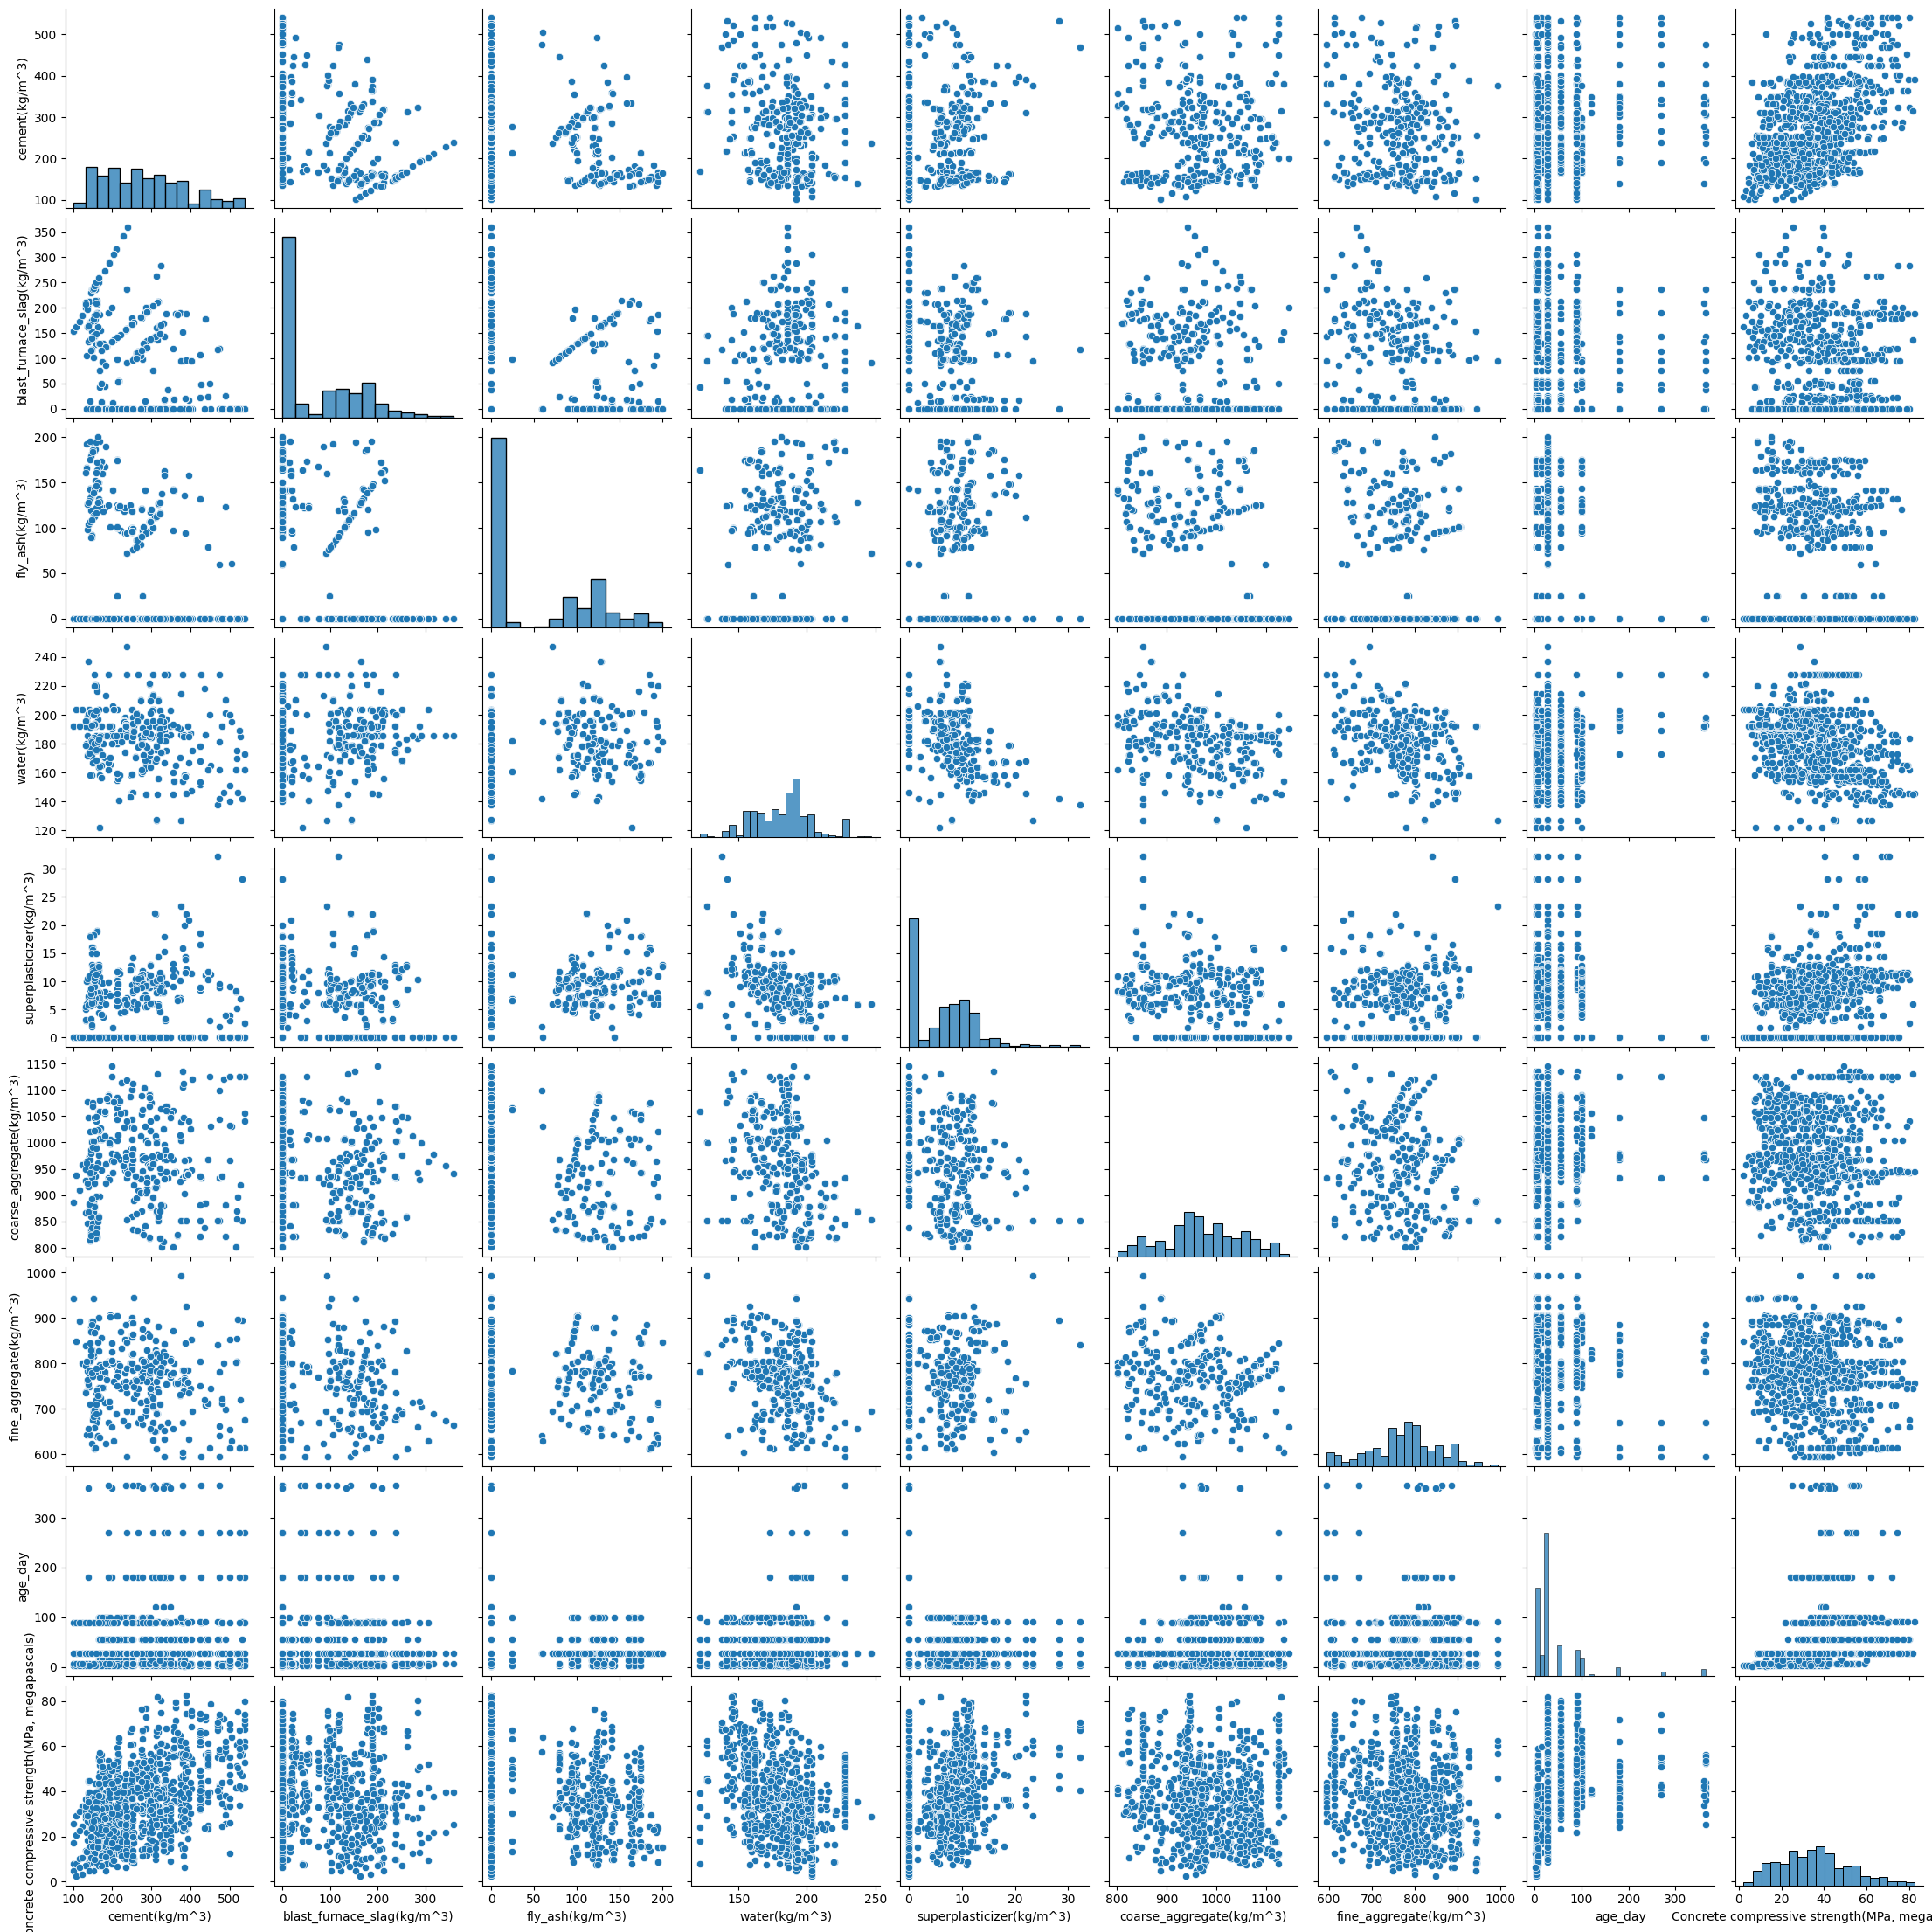

In [ ]:
sns.pairplot(df)

Splitting Data into Train/Test

In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=32)

Building the Pipeline

In [ ]:
num_variables = ['cement(kg/m^3)', 'blast_furnace_slag(kg/m^3)', 'fly_ash(kg/m^3)', 'water(kg/m^3)', 'superplasticizer(kg/m^3)', 'coarse_aggregate(kg/m^3)', 'fine_aggregate(kg/m^3)', 'age_day']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                ('num', MinMaxScaler(), num_variables),

])

In [ ]:
pipeline = Pipeline([
                    ('trans', col_transform),
                    ('mlr', LinearRegression()),
])

Executing the Model

In [ ]:
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['cement(kg/m^3)',
                                                   'blast_furnace_slag(kg/m^3)',
                                                   'fly_ash(kg/m^3)',
                                                   'water(kg/m^3)',
                                                   'superplasticizer(kg/m^3)',
                                                   'coarse_aggregate(kg/m^3)',
                                                   'fine_aggregate(kg/m^3)',
                                                   'age_day'])])),
                ('mlr', LinearRegression())])

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['cement(kg/m^3)',
                                                   'blast_furnace_slag(kg/m^3)',
                                                   'fly_ash(kg/m^3)',
                                                   'water(kg/m^3)',
                                                   'superplasticizer(kg/m^3)',
                                                   'coarse_aggregate(kg/m^3)',
                                                   'fine_aggregate(kg/m^3)',
                                                   'age_day'])])),
                ('mlr', LinearRegression())])

Evaluating the Model

In [ ]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [ ]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

10.514587282521335
9.776270205865023


In [ ]:
r2_score(y_test, y_test_pred)

0.5848411020920081

This model did not do well in determining the correlation between our input variables and the output variable of concrete compressive strength. The root mean square error scores were close in value, which indicates that the training data set and the testing data set are at least consistent with each other. The r2 score was only 0.58, which indicates the strength in correlation of the input variables on the output variable. In this case, not very strong.

# Support Vector Machine Model

Building the Pipeline

In [ ]:
num_attributes=['cement(kg/m^3)', 'blast_furnace_slag(kg/m^3)', 'fly_ash(kg/m^3)', 'water(kg/m^3)', 'superplasticizer(kg/m^3)', 'coarse_aggregate(kg/m^3)', 'fine_aggregate(kg/m^3)', 'age_day']

In [ ]:
column_transform = ColumnTransformer(transformers=[
                                    ('num', StandardScaler(), num_attributes)],
                                    )

In [ ]:
pipeline = Pipeline([
                  ('trans', column_transform),
                  ('SVR', SVR(kernel='linear', C=1, max_iter=100000, epsilon=0.0)),
])

Executing the Model

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cement(kg/m^3)',
                                                   'blast_furnace_slag(kg/m^3)',
                                                   'fly_ash(kg/m^3)',
                                                   'water(kg/m^3)',
                                                   'superplasticizer(kg/m^3)',
                                                   'coarse_aggregate(kg/m^3)',
                                                   'fine_aggregate(kg/m^3)',
                                                   'age_day'])])),
                ('SVR',
                 SVR(C=1, epsilon=0.0, kernel='linear', max_iter=100000))])

Evaluating the Model

In [ ]:
pipeline.score(X_train, y_train)

0.6048333716941658

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred

array([24.23942624, 24.69222807, 12.1110391 , 37.05614689, 30.48103617,
       29.42480076, 68.93051654, 42.55420814, 40.79398445, 31.85383568,
       61.81988739, 46.24809607, 19.87556592, 68.83733971, 48.49749418,
       24.3731957 , 24.56089067, 37.73014048, 25.23291434, 22.40913584,
       22.55051385, 58.60557464, 29.51323026, 22.78750568, 36.24530366,
       47.28016778, 53.18748405, 52.93990256, 32.18957466, 21.82009127,
       43.89343295, 17.63217936, 45.470284  , 67.02001131, 39.70650227,
       31.57078266, 22.46167091, 30.44777694, 25.32312615, 30.28755855,
       24.90317837, 48.74765498, 37.55173486, 62.20780963, 24.72916341,
       32.75604992, 31.07248832, 31.85013035, 31.06180779, 28.0345247 ,
       55.45125439, 25.42009075, 51.41734559, 40.79678326, 43.97672973,
       20.9030599 , 51.2719086 , 37.87137769, 24.30583064, 14.17843022,
       54.32737109, 24.19988259, 36.92497826, 25.42448545, 54.95631224,
       61.81988739, 42.8421582 , 49.23493361, 34.16541432, 58.05

In [ ]:
y_train_pred_svr = pipeline.predict(X_train)
y_test_pred_svr = pipeline.predict(X_test)

In [ ]:
print(mean_squared_error(y_train, y_train_pred_svr)**(0.5))
print(mean_squared_error(y_test, y_test_pred_svr)**(0.5))

10.722346108317419
9.558376897472636


In [ ]:
r2_score(y_test, y_test_pred_svr)

0.6031409761198552

The SVR model also did not do very well in finding the correlation between the input variables and the concrete compression strength. The root mean square error scores between train and test were similar. The r2 score improved by very little with this model. It is 0.60, but is still not a great score.

GridSearch

In [ ]:
parameters = {'SVR__kernel': ['linear', 'rbf', 'poly'],
              'SVR__C': [1,10,20],
    }

In [ ]:
grid_pipeline = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [ ]:
grid_pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['cement(kg/m^3)',
                                                                          'blast_furnace_slag(kg/m^3)',
                                                                          'fly_ash(kg/m^3)',
                                                                          'water(kg/m^3)',
                                                                          'superplasticizer(kg/m^3)',
                                                                          'coarse_aggregate(kg/m^3)',
                                                                          'fine_aggregate(kg/m^3)',
                                                                          'age_day'])])),
                                       ('SVR',
                                        SVR(C=1, epsilon=0.0, kernel='linear',
                                            max_iter=100000))]),
             param_grid={'SVR__C': [1, 10, 20],
                         'SVR__kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid_pipeline.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['cement(kg/m^3)',
                                                                          'blast_furnace_slag(kg/m^3)',
                                                                          'fly_ash(kg/m^3)',
                                                                          'water(kg/m^3)',
                                                                          'superplasticizer(kg/m^3)',
                                                                          'coarse_aggregate(kg/m^3)',
                                                                          'fine_aggregate(kg/m^3)',
                                                                          'age_day'])])),
                                       ('SVR',
                                        SVR(C=1, epsilon=0.0, kernel='linear',
                                            max_iter=100000))]),
             param_grid={'SVR__C': [1, 10, 20],
                         'SVR__kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid_pipeline.best_params_

{'SVR__C': 20, 'SVR__kernel': 'rbf'}

In [ ]:
grid_pipeline.score(X_train, np.ravel(y_train))

0.8898287082651661

In [ ]:
y_train_pred_grid = grid_pipeline.predict(X_train)
y_test_pred_grid = grid_pipeline.predict(X_test)

In [ ]:
print(mean_squared_error(y_train, y_train_pred_grid)**(0.5))
print(mean_squared_error(y_test, y_test_pred_grid)**(0.5))

5.661531288569424
6.011355546378448


In [ ]:
r2_score(y_test, y_test_pred_grid)

0.843031398776355

I performed a GridSearch on the SVR model and it greatly improved the scores for this data set. It found that the best parameters are a regularization parameter of 20 and the best kernel type is rbf. The root mean square error values are low in value and close to each other as well. The r2 score improved greatly from 0.60 to 0.84. These parameter changes show a much higher strength in correlation between the input values and concrete compression strength.